In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv') 
print(train.head())
test = pd.read_csv('test.csv')
print('train data:' + str(train.shape))
print('test data:' + str(test.shape))
train_df = train.drop('label', axis=1)
train_arr = train_df.values
test_arr = test.values
labels = train.label.to_numpy()

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

1


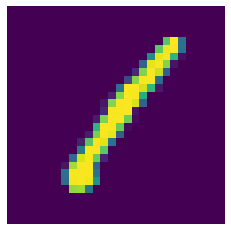

In [3]:
plt.imshow(train_arr[0].reshape(28,28))
plt.axis('off')
print(labels[0])

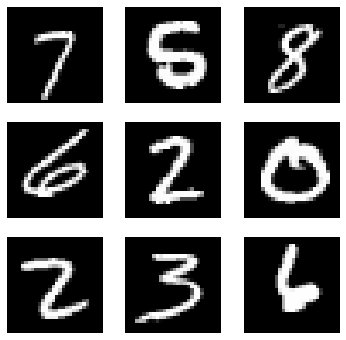

In [4]:
plt.figure(figsize=(6,6))
start = 18
for i in range(9):
    img = np.asarray(train_df.iloc[i+start,0:].values.reshape((28,28))/255)
    ax=plt.subplot(3, 3, i+1)
    ax.grid(False)
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

Text(0.5, 1.0, 'distribution of labels in training set')

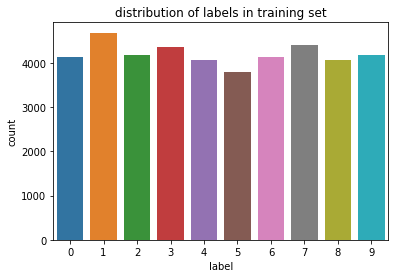

In [21]:
sns.countplot(x='label', data=train)
plt.title('distribution of labels in training set')

In [5]:
from torchsummary import summary
from loader import create_loaders
from classifier import Classifier

In [ ]:
conf = {
        'epochs': 100,
        'batch_size': 100,
        'base_lr': 0.01,
        'momentum': 0.9,
        'num_classes': 10
}
print(conf)
NET_PATH = './mnist_net.pth'
loaders = create_loaders(conf)
is_train = True
estimator = Classifier(conf)
print(summary(estimator.net, (1,28,28)))
if is_train:
    estimator.fit(loaders, conf['epochs'], resume=False)
    estimator.save(NET_PATH)
else:
    estimator.load(NET_PATH)
    result = estimator.test_nolabel(loaders['test'])
    submission = pd.read_csv('submission/sample_submission.csv')
    submission['Label'] = result
    submission.to_csv('submission.csv', index=False) 